In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [49]:
data = pd.read_csv('drink.csv')
print(data.shape)
data.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [50]:
data.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [51]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [52]:
# Quality category

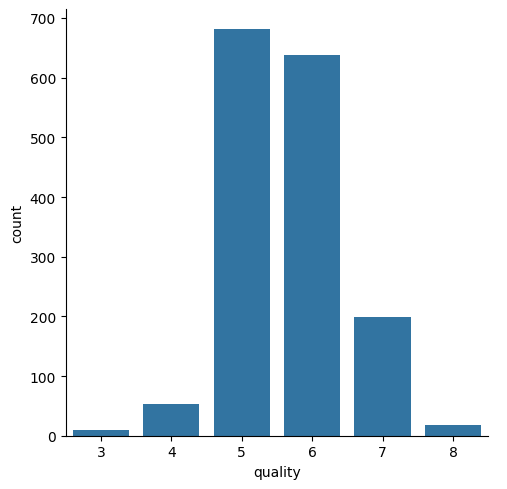

In [53]:
sns.catplot(x='quality', data=data, kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

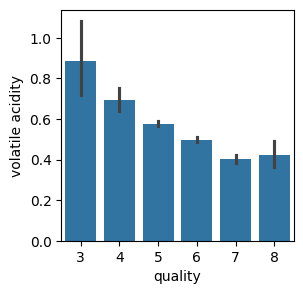

In [54]:
# volatile acidity vs quality
plot= plt.figure(figsize=(3, 3))
sns.barplot(x='quality', y='volatile acidity', data=data)

<Axes: xlabel='quality', ylabel='citric acid'>

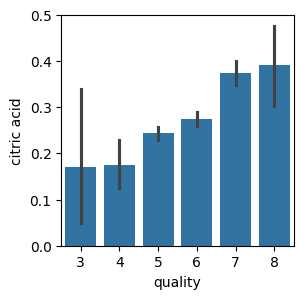

In [55]:
# citric acid vs quality
plot= plt.figure(figsize=(3, 3))
sns.barplot(x='quality', y='citric acid', data=data)

<Axes: >

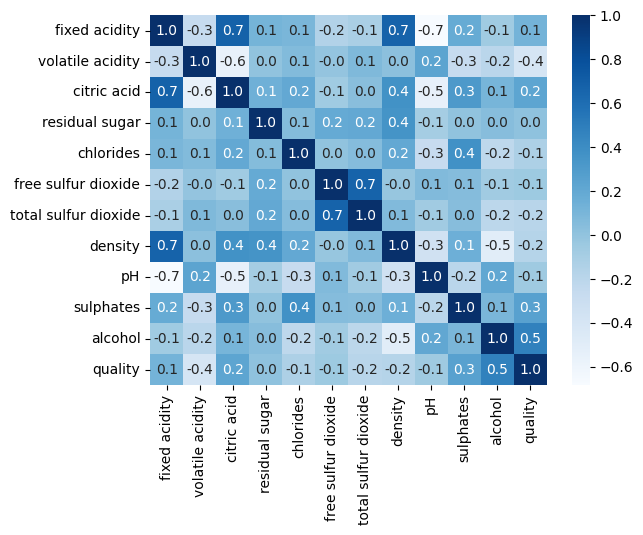

In [56]:
sns.heatmap(data.corr(), annot=True, cmap='Blues', fmt='.1f')

In [57]:
X = data.drop('quality', axis = 1)
Y = data['quality']

In [58]:
print(X.shape, Y.shape)

(1599, 11) (1599,)


In [59]:
#label binarization
Y = data['quality'].apply(lambda y: 1 if y>=7 else 0)
Y.value_counts()

,count
quality,
0,1382
1,217


In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [61]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [62]:
test_pred = model.predict(X_test)
accuracy = accuracy_score(test_pred, Y_test)
print('Accuracy on training data : ', accuracy)

Accuracy on training data :  0.921875


In [75]:
# Predictive system
input = (7.4,0.66,0.0,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4)
input_as_array = np.asarray(input)
input_reshaped = input_as_array.reshape(1, -1)
prediction = model.predict(input_reshaped)
print(prediction)
if prediction[0] == 1:
    print('Good Quality')
else:
    print('Bad Quality')

[0]
Bad Quality


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
